In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import joblib

In [152]:
df=pd.read_csv("Covid.csv",parse_dates=['Date'])
df

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [153]:
print(df.dtypes)
print(df.shape)

Date         datetime64[ns]
Country              object
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object
(23688, 5)


In [154]:
df.describe(include="all") 

,Date,Country,Confirmed,Recovered,Deaths
count,23688,23688,2.368800e+04,23688.000000,23688.000000
unique,126,188,NaN,NaN,NaN
top,2020-04-09 00:00:00,Burma,NaN,NaN,NaN
freq,188,126,NaN,NaN,NaN
first,2020-01-22 00:00:00,NaN,NaN,NaN,NaN
last,2020-05-26 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,7.969368e+03,2581.801714,526.935030
std,NaN,NaN,5.842109e+04,15143.101257,3992.815956
min,NaN,NaN,0.000000e+00,0.000000,0.000000
25%,NaN,NaN,0.000000e+00,0.000000,0.000000


In [155]:
df.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

Confirmed       AxesSubplot(0.125,0.536818;0.227941x0.343182)
Recovered    AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Deaths       AxesSubplot(0.672059,0.536818;0.227941x0.343182)
dtype: object

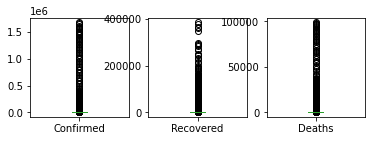

In [156]:
df.plot(kind='box',subplots=True,layout=(2,3))

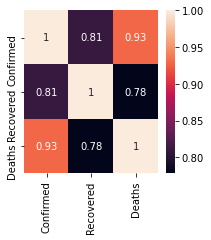

In [157]:
corr_hmap=df.corr()
plt.figure(figsize=(3,3))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [158]:
df.drop('Date',axis=1,inplace=True)

df.drop('Country',axis=1,inplace=True)

In [159]:
df

,Confirmed,Recovered,Deaths
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
23683,429,365,3
23684,9,6,1
23685,249,10,49
23686,920,336,7


In [160]:
df.skew()

Confirmed    18.674502
Recovered    10.662286
Deaths       14.218167
dtype: float64

In [161]:
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [162]:
df.skew()

Confirmed    0.538470
Recovered    1.011590
Deaths       1.598833
dtype: float64

In [163]:
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.02851613, 0.8092577 , 0.67086286],
       [1.02851613, 0.8092577 , 0.67086286],
       [1.02851613, 0.8092577 , 0.67086286],
       ...,
       [0.50534411, 0.05256909, 0.96586491],
       [0.86759469, 1.02734898, 0.19914217],
       [0.09464234, 0.21887918, 0.00250018]])

In [164]:
threshold=3
print(np.where(z>3))

(array([11741, 11929, 12117, 12305, 12493, 12681, 12754, 12869, 12942,
       13057, 13130, 13245, 13318, 13334, 13433, 13506, 13522, 13598,
       13621, 13694, 13710, 13786, 13809, 13882, 13898, 13974, 13997,
       14070, 14086, 14162, 14185, 14258, 14274, 14350, 14373, 14446,
       14462, 14466, 14538, 14561, 14634, 14650, 14654, 14726, 14749,
       14822, 14838, 14842, 14914, 14937, 15010, 15026, 15030, 15102,
       15125, 15198, 15214, 15218, 15290, 15313, 15386, 15402, 15406,
       15478, 15501, 15574, 15590, 15594, 15666, 15689, 15762, 15778,
       15782, 15854, 15877, 15950, 15966, 15970, 16042, 16065, 16138,
       16154, 16158, 16230, 16253, 16326, 16342, 16346, 16418, 16441,
       16514, 16530, 16534, 16606, 16629, 16702, 16718, 16722, 16794,
       16817, 16890, 16906, 16910, 16982, 17005, 17078, 17094, 17098,
       17170, 17193, 17266, 17282, 17286, 17312, 17358, 17381, 17454,
       17470, 17474, 17500, 17546, 17569, 17642, 17658, 17662, 17688,
       17734, 17757

In [165]:
df2=df[(z<3).all(axis=1)]
print(df.shape)
print(df2.shape)

(23688, 3)
(23288, 3)


In [166]:
x=df2.iloc[:,:-1].values
x

array([[0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       ...,
       [5.52146092, 2.39789527],
       [6.82546004, 5.82008293],
       [4.04305127, 3.25809654]])

In [167]:
y=df2.iloc[:,-1].values
y

array([0.        , 0.        , 0.        , ..., 3.91202301, 2.07944154,
       1.60943791])

In [168]:
max_r_score=0
for r_state in range(0,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=r_state)
    lr=linear_model.LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2_score correspondint to: ",final_r_state,"is ",max_r_score)



max r2_score correspondint to:  18 is  0.8323953619285452


In [170]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=18)
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
ABR= AdaBoostRegressor()
ABR.fit(x_train,y_train)
print(ABR.score(x_train,y_train))
ABRpred=ABR.predict(x_test)
print(ABRpred)
ABR.score(x_test,y_test)

0.9003843355473403
[0.06275305 4.24950742 0.06275305 ... 2.81410807 0.06275305 1.08151008]


0.9064147502947612

In [172]:
joblib.dump(ABR,'final.obj')

['final.obj']